In [1]:
"""Topic: Exploring and visualizing NFL statistics in pandas)
Web scraping data from Pro-Football-Reference for analysis
"""

from bs4 import BeautifulSoup
import requests, re
import pandas as pd
import numpy as np
from stat_functions import all_position_stats, all_rb_defense_headers, all_wide_receiver_quarterback_headers
from get_df import get_running_back_df, get_wide_receiver_df, get_defense_df, all_individual_stats
from get_df_fantasy import fantasy_points


import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm

In [2]:
# df_all_running_backs_2019 = all_position_stats('2019','rushing', 29)
# df_all_running_backs_2019.columns = all_rb_defense_headers('2019','rushing')
# df_all_running_backs_2019.to_pickle("./pickled/df_all_running_backs_2019.pkl")

# Pickling
df_all_running_backs_2019 = pd.read_pickle("./pickled/df_all_running_backs_2019.pkl")
df_all_running_backs_2019[['Att','Yds','TD','Y/A','Y/G']] = df_all_running_backs_2019[['Att','Yds','TD','Y/A','Y/G']].apply(pd.to_numeric)
df_all_running_backs_2019 = df_all_running_backs_2019.sort_values('Yds',ascending=False)
df_all_running_backs_2019


,Link,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
Derrick Henry,/players/H/HenrDe00.htm,Derrick Henry *,TEN,25,RB,15,15,303,1540,16,73,74,5.1,102.7,5
Nick Chubb,/players/C/ChubNi00.htm,Nick Chubb*,CLE,24,RB,16,16,298,1494,8,62,88,5.0,93.4,3
Christian McCaffrey,/players/M/McCaCh01.htm,Christian McCaffrey *+,CAR,23,RB,16,16,287,1387,15,57,84,4.8,86.7,1
Ezekiel Elliott,/players/E/ElliEz00.htm,Ezekiel Elliott*,DAL,24,RB,16,16,301,1357,12,78,33,4.5,84.8,3
Chris Carson,/players/C/CarsCh00.htm,Chris Carson,SEA,25,RB,15,15,278,1230,7,75,59,4.4,82.0,7
Lamar Jackson,/players/J/JackLa00.htm,Lamar Jackson*+,BAL,22,QB,15,15,176,1206,7,71,47,6.9,80.4,9
Leonard Fournette,/players/F/FourLe00.htm,Leonard Fournette,JAX,24,RB,15,15,265,1152,3,55,81,4.3,76.8,1
Josh Jacobs,/players/J/JacoJo01.htm,Josh Jacobs,OAK,21,RB,13,13,242,1150,7,53,51,4.8,88.5,1
Joe Mixon,/players/M/MixoJo00.htm,Joe Mixon,CIN,23,RB,16,15,278,1137,5,56,41,4.1,71.1,0
Dalvin Cook,/players/C/CookDa01.htm,Dalvin Cook*,MIN,24,RB,14,14,250,1135,13,60,75,4.5,81.1,4


In [3]:
# df_all_wide_receivers_2019 = all_position_stats('2019','receiving', 29)
# df_all_wide_receivers_2019.columns = all_wide_receiver_quarterback_headers('2019','receiving')
# df_all_wide_receivers_2019.to_pickle("./pickled/df_all_wide_receivers_2019.pkl")

# Pickling
df_all_wide_receivers_2019 = pd.read_pickle("./pickled/df_all_wide_receivers_2019.pkl")
df_all_wide_receivers_2019[['Rec','Yds','Yds','Y/R','TD']] = df_all_wide_receivers_2019[['Rec','Yds','Yds','Y/R','TD']].apply(pd.to_numeric)
df_all_wide_receivers_2019 = df_all_wide_receivers_2019.sort_values('Yds',ascending=False)
df_all_wide_receivers_2019


,Link,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
Michael Thomas,/players/T/ThomMi05.htm,Michael Thomas*+,NOR,26,WR,16,15,185,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1
Julio Jones,/players/J/JoneJu02.htm,Julio Jones *,ATL,30,WR,15,15,157,99,63.1%,1394,14.1,6,77,54,8.9,6.6,92.9,1
Chris Godwin,/players/G/GodwCh00.htm,Chris Godwin*,TAM,23,WR,14,14,121,86,71.1%,1333,15.5,9,63,71,11.0,6.1,95.2,0
Travis Kelce,/players/K/KelcTr00.htm,Travis Kelce*,KAN,30,TE,16,16,136,97,71.3%,1229,12.7,5,65,47,9.0,6.1,76.8,1
Keenan Allen,/players/A/AlleKe00.htm,Keenan Allen*,LAC,27,WR,16,16,149,104,69.8%,1199,11.5,6,63,45,8.0,6.5,74.9,0
Amari Cooper,/players/C/CoopAm00.htm,Amari Cooper*,DAL,25,WR,16,16,119,79,66.4%,1189,15.1,8,54,53,10.0,4.9,74.3,0
D.J. Moore,/players/M/MoorD.00.htm,D.J. Moore,CAR,22,WR,15,15,135,87,64.4%,1175,13.5,4,63,52,8.7,5.8,78.3,2
Jarvis Landry,/players/L/LandJa00.htm,Jarvis Landry*,CLE,27,WR,16,16,138,83,60.1%,1174,14.1,6,55,65,8.5,5.2,73.4,0
DeAndre Hopkins,/players/H/HopkDe00.htm,DeAndre Hopkins*+,HOU,27,WR,15,15,150,104,69.3%,1165,11.2,7,68,43,7.8,6.9,77.7,0
Cooper Kupp,/players/K/KuppCo00.htm,Cooper Kupp,LAR,26,WR,16,14,134,94,70.1%,1161,12.4,10,51,66,8.7,5.9,72.6,3


In [4]:
# all_running_backs_2019 = all_individual_stats(get_running_back_df, df_all_running_backs_2019, '2019')
# all_running_backs_2019.to_pickle("./pickled/all_running_backs_2019.pkl")

all_running_backs_2019 = pd.read_pickle("./pickled/all_running_backs_2019.pkl")
all_running_backs_2019

,index,Name,Date,Game,Team,Carries,Rush_Yards,Yards_per_Carry,Rush_TD,Receptions,Receiving_Yards,Y/R,Receiving_TD
0,0,Derrick Henry,2019-09-08,1,TEN,19.0,84.0,4.42,1.0,1.0,75.0,75.00,1.0
1,1,Derrick Henry,2019-09-15,2,TEN,15.0,82.0,5.47,1.0,2.0,12.0,6.00,0.0
2,2,Derrick Henry,2019-09-19,3,TEN,17.0,44.0,2.59,1.0,1.0,2.0,2.00,0.0
3,3,Derrick Henry,2019-09-29,4,TEN,27.0,100.0,3.70,0.0,1.0,8.0,8.00,0.0
4,4,Derrick Henry,2019-10-06,5,TEN,20.0,78.0,3.90,1.0,0.0,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,11,Peyton Barber,2019-12-01,12,TAM,17.0,44.0,2.59,2.0,0.0,0.0,,0.0
447,12,Peyton Barber,2019-12-08,13,TAM,11.0,34.0,3.09,0.0,2.0,19.0,9.50,0.0
448,13,Peyton Barber,2019-12-15,14,TAM,10.0,17.0,1.70,0.0,2.0,23.0,11.50,0.0
449,14,Peyton Barber,2019-12-21,15,TAM,5.0,13.0,2.60,0.0,0.0,0.0,,0.0


In [35]:
# all_running_backs_fantasy_2019 = all_individual_stats(fantasy_points, df_all_running_backs_2019, '2019')
# all_running_backs_fantasy_2019.to_pickle("./pickled/all_running_backs_fantasy_2019.pkl")

# all_running_backs_fantasy_2019 = pd.read_pickle("./pickled/all_running_backs_fantasy_2019.pkl")
all_running_backs_fantasy_2019

,index,Name,Fantasy_Points
0,0,Derrick Henry,27.9
1,1,Derrick Henry,15.4
2,2,Derrick Henry,10.6
3,3,Derrick Henry,10.8
4,4,Derrick Henry,13.8
...,...,...,...
446,11,Peyton Barber,18.4
447,12,Peyton Barber,5.3
448,13,Peyton Barber,4.0
449,14,Peyton Barber,-0.7


In [37]:
df_rushing_fantasy_2019 = all_running_backs_fantasy_2019.iloc[:,-1:]

rush_yard_points = all_running_backs_2019.iloc[:,6:7]/10
receiving_yard_points = all_running_backs_2019.iloc[:,10:11]/10
df_rushing_fantasy_2019['Total_Yards_Points'] = rush_yard_points['Rush_Yards'] + receiving_yard_points['Receiving_Yards']

rush_td_points = all_running_backs_2019.iloc[:,8:9]*6
receiving_td_points = all_running_backs_2019.iloc[:,-1:]*6
df_rushing_fantasy_2019['Total_TD_Points'] = rush_td_points['Rush_TD'] + receiving_td_points['Receiving_TD']

df_rushing_fantasy_2019

,Fantasy_Points,Total_Yards_Points,Total_TD_Points
0,27.9,15.9,12.0
1,15.4,9.4,6.0
2,10.6,4.6,6.0
3,10.8,10.8,0.0
4,13.8,7.8,6.0
...,...,...,...
446,18.4,4.4,12.0
447,5.3,5.3,0.0
448,4.0,4.0,0.0
449,-0.7,1.3,0.0


In [6]:
# all_wide_receivers_2019 = all_individual_stats(get_wide_receiver_df, df_all_wide_receivers_2019, '2019')
# all_wide_receivers_2019.to_pickle("./pickled/all_wide_receivers_2019.pkl")

all_wide_receivers_2019 = pd.read_pickle("./pickled/all_wide_receivers_2019.pkl")
all_wide_receivers_2019

,index,Name,Date,Game,Week,Team,Opp,Result,Targets,Receptions,Total_Yards,Yards_per_Reception,Touchdowns,Catch%
0,0,Michael Thomas,2019-09-09,1,1,NOR,HOU,W 30-28,13,10,123.0,12.30,0,76.9%
1,1,Michael Thomas,2019-09-15,2,2,NOR,LAR,L 9-27,13,10,89.0,8.90,0,76.9%
2,2,Michael Thomas,2019-09-22,3,3,NOR,SEA,W 33-27,7,5,54.0,10.80,1,71.4%
3,3,Michael Thomas,2019-09-29,4,4,NOR,DAL,W 12-10,9,9,95.0,10.56,0,100.0%
4,4,Michael Thomas,2019-10-06,5,5,NOR,TAM,W 31-24,13,11,182.0,16.55,2,84.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,11,Tarik Cohen,2019-11-28,12,13,CHI,DET,W 24-20,4,4,26.0,6.50,0,100.0%
456,12,Tarik Cohen,2019-12-05,13,14,CHI,DAL,W 31-24,6,6,24.0,4.00,0,100.0%
457,13,Tarik Cohen,2019-12-15,14,15,CHI,GNB,L 13-21,10,7,57.0,8.14,0,70.0%
458,14,Tarik Cohen,2019-12-22,15,16,CHI,KAN,L 3-26,4,3,25.0,8.33,0,75.0%


In [16]:
all_wide_receivers_fantasy_2019 = all_individual_stats(fantasy_points, df_all_wide_receivers_2019, '2019')
all_wide_receivers_fantasy_2019.to_pickle("./pickled/all_wide_receivers_fantasy_2019.pkl")

all_wide_receivers_fantasy_2019 = pd.read_pickle("./pickled/all_wide_receivers_fantasy_2019.pkl")

In [17]:
all_wide_receivers_fantasy_2019

,index,Name,Fantasy_Points
0,0,Michael Thomas,12.3
1,1,Michael Thomas,8.9
2,2,Michael Thomas,11.4
3,3,Michael Thomas,9.5
4,4,Michael Thomas,30.2
...,...,...,...
455,11,Tarik Cohen,3.5
456,12,Tarik Cohen,3.1
457,13,Tarik Cohen,8.5
458,14,Tarik Cohen,3.3


In [9]:
# michael_thomas_wr_2019 = get_wide_receiver_df('/players/T/ThomMi05.htm')
# michael_thomas_wr_2019.to_pickle("./pickled/michael_thomas_wr_2019.pkl")

# Pickling
# michael_thomas_wr_2019 = pd.read_pickle("./pickled/michael_thomas_wr_2019.pkl")
# michael_thomas_wr_2019

In [38]:
df_rushing_fantasy_2019.corr()

,Fantasy_Points,Total_Yards_Points,Total_TD_Points
Fantasy_Points,1.000000,0.828857,0.339718
Total_Yards_Points,0.828857,1.000000,0.191857
Total_TD_Points,0.339718,0.191857,1.000000


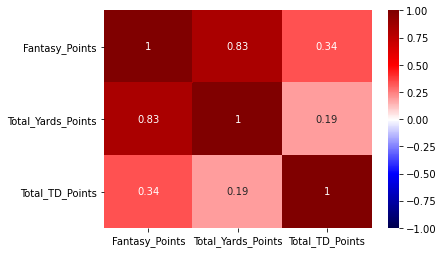

In [39]:
# example of a better corr matrix
# do this for all running backs, wide receivers, and quarterbacks
sns.heatmap(df_rushing_fantasy_2019.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

&lt;Figure size 1440x540 with 0 Axes&gt;

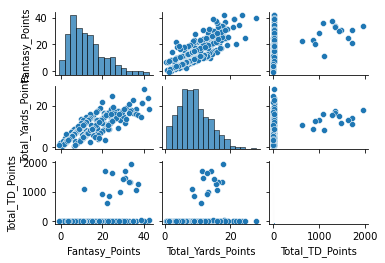

In [40]:
# do this for all running backs, wide receivers, and quarterbacks
plt.figure(figsize = [20,7.5])

sns.pairplot(df_rushing_fantasy_2019, height=1.2, aspect=1.5);

In [43]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Fantasy_Points ~ Total_Yards_Points + Total_TD_Points', data=df_rushing_fantasy_2019, 
return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fantasy_Points   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     577.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          1.34e-124
Time:                        23:56:10   Log-Likelihood:                -1316.8
No. Observations:                 450   AIC:                             2640.
Df Residuals:                     447   BIC:                             2652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1890      0.456     -0.415      0.678      -1.084       0.706
Total_Yards_Points     1.4192      0.046     31.141      0.000       1.330       1.509
Total_TD_Points        0.0067      0.001      7.368      0.000       0.005       0.008
==============================================================================
Omnibus:                       50.619   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.295
Skew:                           0.839   Prob(JB):                     4.02e-15
Kurtosis:                       3.847   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
&quot;&quot;&quot;

In [45]:
# Define the model
lm1 = smf.ols('Fantasy_Points ~ Total_Yards_Points + Total_TD_Points', data=df_rushing_fantasy_2019)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

NameError: name &#39;smf&#39; is not defined

In [44]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Use only one feature: Carries/Game for Running Back

# Split the data into training/testing sets
carries_derrick_henry_train = carries_derrick_henry_rb_2019_array[:-4]
carries_derrick_henry_test = carries_derrick_henry_rb_2019_array[-4:]

# Target Variable: Rushing Yards/Game for Running Back
# Y-Variable
yards_derrick_henry = derrick_henry_rb_2019_trim['Total_Yards']

# Split the targets into training/testing sets
yards_derrick_henry_train = yards_derrick_henry[:-4]
yards_derrick_henry_test = yards_derrick_henry[-4:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(carries_derrick_henry_train, yards_derrick_henry_train)

# Make predictions using the testing set
yards_derrick_henry_pred = regr.predict(carries_derrick_henry_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yards_derrick_henry_test, yards_derrick_henry_pred))
# # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yards_derrick_henry_test, yards_derrick_henry_pred))

# # Plot outputs
plt.scatter(carries_derrick_henry_test, yards_derrick_henry_test,  color='black')
plt.plot(carries_derrick_henry_test, yards_derrick_henry_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

NameError: name &#39;carries_derrick_henry_rb_2019_array&#39; is not defined

In [45]:
YC_derrick_henry_rb_2019_array = np.array(derrick_henry_rb_2019_trim[['Yards_per_Carry']].values.tolist())

In [47]:
YC_derrick_henry[:-4]

array([[4.42],
       [5.47],
       [2.59],
       [3.7 ],
       [3.9 ],
       [1.87],
       [4.09],
       [4.69],
       [4.85],
       [8.17],
       [8.37]])

In [48]:
YC_derrick_henry[-4:]

array([[5.73],
       [5.72],
       [4.1 ],
       [6.59]])

Coefficients: 
 [21.07662871]
Mean squared error: 2074.19
Coefficient of determination: 0.12


[&lt;matplotlib.lines.Line2D at 0x14c1b48e0&gt;]

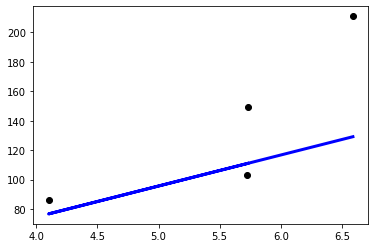

In [46]:
# Use only one feature: Carries/Game for Running Back
# X-Variable
YC_derrick_henry = YC_derrick_henry_rb_2019_array

# Split the data into training/testing sets
YC_derrick_henry_train = YC_derrick_henry[:-4]
YC_derrick_henry_test = YC_derrick_henry[-4:]

# Target Variable: Rushing Yards/Game for Running Back
# Y-Variable
yards_derrick_henry = derrick_henry_rb_2019_trim['Total_Yards']

# Split the targets into training/testing sets
yards_derrick_henry_train = yards_derrick_henry[:-4]
yards_derrick_henry_test = yards_derrick_henry[-4:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(YC_derrick_henry_train, yards_derrick_henry_train)

# Make predictions using the testing set
yards_derrick_henry_pred = regr.predict(YC_derrick_henry_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yards_derrick_henry_test, yards_derrick_henry_pred))
# # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yards_derrick_henry_test, yards_derrick_henry_pred))

# # Plot outputs
plt.scatter(YC_derrick_henry_test, yards_derrick_henry_test,  color='black')
plt.plot(YC_derrick_henry_test, yards_derrick_henry_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()